# Inport Data and Modules

In [2]:
# Imports
import numpy as np
import pandas as pd

# Import train-test split function
from sklearn.model_selection import train_test_split

# Import the RandomForestClassifier and DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from sklearn.utils import resample

# Import Visualization Modules
import matplotlib.pyplot as plt
import plotly_express as px

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
mini = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")


# Base Attempt(Tree & Forest)

In [16]:
# Basic Hot encoding, data splitting, model training and testing

X = pd.get_dummies(df.drop("y", axis=1))
X
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

t_model = DecisionTreeClassifier(random_state=42)
f_model = RandomForestClassifier(random_state=42)

t_model.fit(X_train, y_train)
f_model.fit(X_train, y_train)

tree_predict = t_model.predict(X_test)
for_predict = f_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_predict)
for_acc = accuracy_score(y_test, for_predict)

display(tree_acc)
display(for_acc)

0.8404370110601564

0.8898030752630159

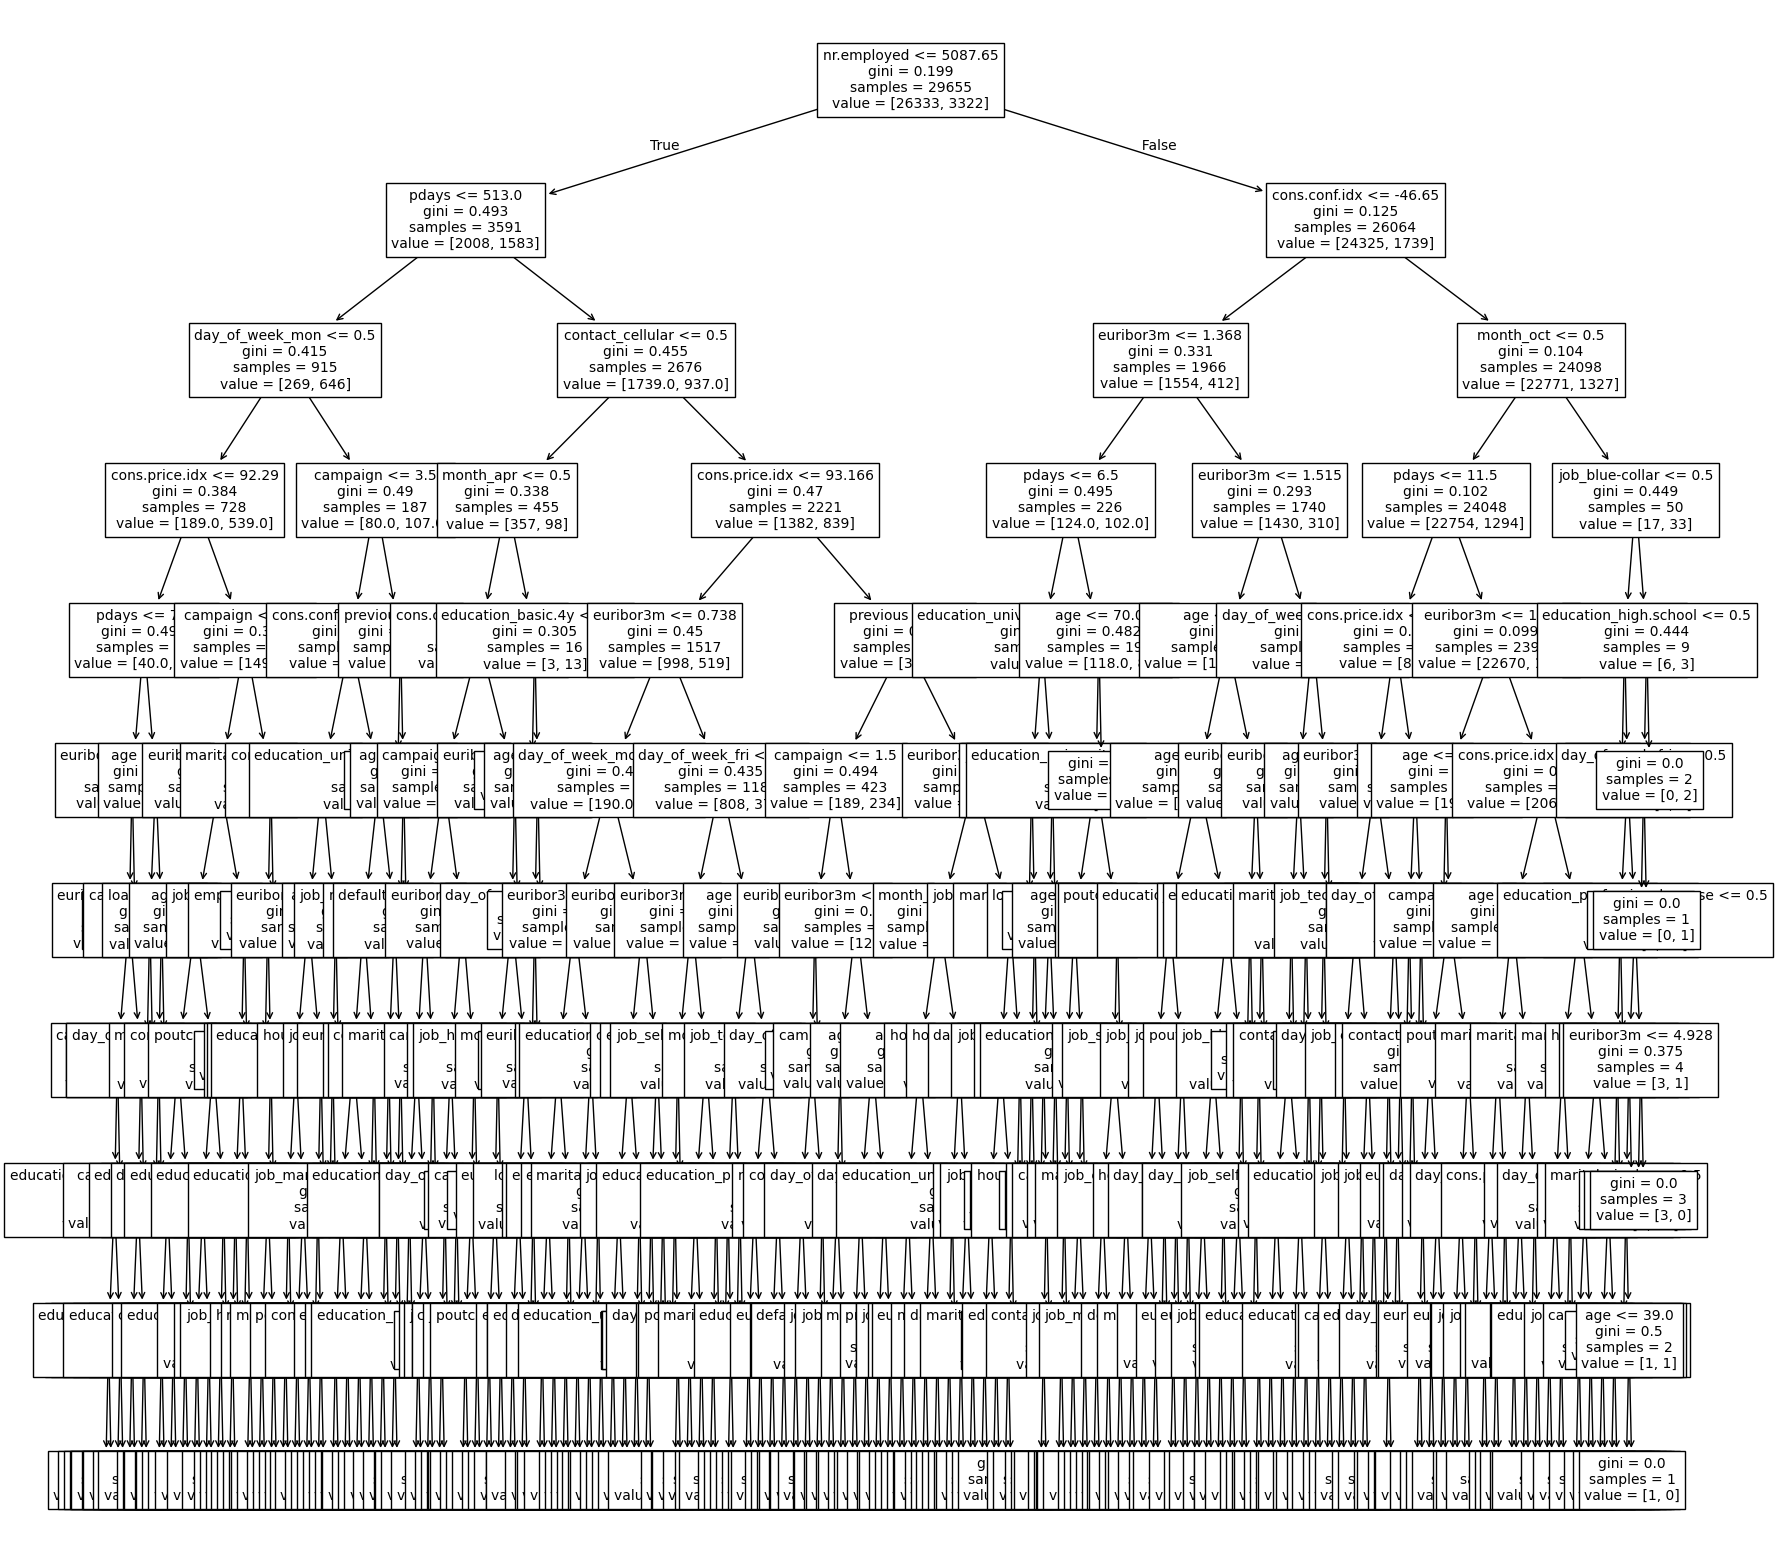

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(t_model, fontsize=10, feature_names=X.columns)
plt.show()

In [9]:
f_model.estimators_.count

<function list.count(value, /)>

# 1st Tuned Parameters Attempt

For this attempt we will focus on tuning we will focus on 3 parameters:
* max_depth
    * Current State: Good. It seems that 10 is the best value.

* min_sample_split
    * Current State: Good. It seems that 225 is the best value.

* class_weights
    * Current State: Barely Started

I will be using three basic scores to evaluate this model setup:
* Accuracy
* Recall
* Precision

CURRENT RESULTS!!!
We SUCK. I don't have any of the data cleaned, and even fine tuning the parameters gives an accuracy of tops .8946. The issue comes from our *Recall*. Currently we are sitting at a whopping .2 or worse. That means that nearly 4 out of every 5 that should be predicted as a positive is being falsely labeled as a negative. :( gonna work on that next.

In [107]:
# Basic Hot encoding, data splitting, model training and testing

X = pd.get_dummies(df.drop("y", axis=1)).drop("default_yes", axis=1)
X
y = df["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#parameters
md = 20
min_samp = 200
class_weight = np.where(y_train == "no", 0.2, 1.0)

t_model = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=min_samp)
f_model = RandomForestClassifier(random_state=42,
    max_depth=17, 
    min_samples_split=min_samp,
    n_estimators=100)

t_model.fit(X_train, y_train, sample_weight=class_weight)
f_model.fit(X_train, y_train)

tree_predict = t_model.predict(X_test)
for_predict = f_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_predict)
for_acc = accuracy_score(y_test, for_predict)
tree_recall = recall_score(y_test, tree_predict, pos_label='yes')
for_recall = recall_score(y_test, for_predict, pos_label='yes')
tree_pre = precision_score(y_test, tree_predict, pos_label='yes')
for_pre = precision_score(y_test, for_predict, pos_label='yes')


display(tree_acc)
display(for_acc)
display(tree_recall)
display(for_recall)
display(tree_pre)
display(for_pre)


0.8479902886431077

0.8954680334502293

0.6027088036117382

0.21331828442437922

0.4079449961802903

0.7078651685393258

In [ ]:
# Just printing out the tree cause it looks cool :)
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(t_model, fontsize=10, feature_names=X.columns)
plt.show()

# Cleaning

In [4]:
df = df.drop_duplicates()
df["y"].value_counts()

y
no     31406
yes     4176
Name: count, dtype: int64

In [62]:
# Assuming 'df' is your DataFrame and 'class_column' is the target column
majority_class = df[df['y'] == "no"]
minority_class = df[df['y'] == "yes"]

# Downsample majority class
majority_class_downsampled = resample(majority_class,
                                      replace=False,  # sample without replacement
                                      n_samples=len(minority_class) * 2,  # match minority class
                                      random_state=42)  # for reproducibility

# Combine
df = pd.concat([majority_class_downsampled, minority_class])

# Predict Mini Holdout

In [36]:
# test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Do same transformations as on the training set
test = pd.get_dummies(mini)
mini_predictions = t_model.predict(test)

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(mini_predictions, columns = ['y'])

# Replace no with 0 and yes with 1
my_predictions = my_predictions["y"].replace({"no":0, "yes":1})

# Replace PUTTEAMNUMBERHERE with your team
my_predictions.to_csv("lilJiimy's-module2-predictions.csv",index=False)

C:\Users\josep\AppData\Local\Temp\ipykernel_2784\254240971.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_predictions = my_predictions["y"].replace({"no":0, "yes":1})


# Large Eval

In [12]:
# Basic Hot encoding, data splitting, model training and testing
def get_nums(test_size, md, min_samp, weight):
    X = pd.get_dummies(df.drop("y", axis=1)).drop("default_yes", axis=1)
    X
    y = df["y"]

    #Parameters
    
    


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    class_weight = np.where(y_train == "no", weight, 1.0)

    t_model = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=min_samp)
    # f_model = RandomForestClassifier(random_state=42,
    #     max_depth=17, 
    #     min_samples_split=min_samp,
    #     n_estimators=100)

    t_model.fit(X_train, y_train, sample_weight=class_weight)
    # f_model.fit(X_train, y_train)

    tree_predict = t_model.predict(X_test)
    # for_predict = f_model.predict(X_test)

    tree_acc = accuracy_score(y_test, tree_predict)
    # for_acc = accuracy_score(y_test, for_predict)
    tree_recall = recall_score(y_test, tree_predict, pos_label='yes')
    # for_recall = recall_score(y_test, for_predict, pos_label='yes')
    tree_pre = precision_score(y_test, tree_predict, pos_label='yes')
    # for_pre = precision_score(y_test, for_predict, pos_label='yes')

    return tree_acc, tree_recall, tree_pre
    # display(tree_acc)
    # display(for_acc)
    # display(tree_recall)
    # display(for_recall)
    # display(tree_pre)
    # display(for_pre)

In [ ]:
full = []
i = 0
for test in np.arange(.1, .4, .05):
    for samp_size in range(50, 500, 100):
        for md in range(10, 200, 25):
            for wght in np.arange(.0, .55, .05):
                acc, recall, pre = get_nums(test, md, samp_size, wght)
                nummies = [test, samp_size, md, wght, acc, recall, pre]
                full.append(nummies)
                print(i)
                i +=1

big = pd.DataFrame(full, columns=["test", "samp_size", "md", "wght", "acc", "recall", "pre"])
big.to_csv("nummies.csv")


In [27]:
full = []
for test in np.arange(.1, .4, .05):
    for samp_size in range(50, 500, 100):
        for md in range(10, 200, 25):
            for wght in np.arange(.0, .55, .05):
                nummies = [test, samp_size, md, wght]
                full.append(nummies)

pd.DataFrame(full, columns=["test", "samp_size", "md", "wght"])



,test,samp_size,md,wght
0,0.1,50,10,0.00
1,0.1,50,10,0.05
2,0.1,50,10,0.10
3,0.1,50,10,0.15
4,0.1,50,10,0.20
...,...,...,...,...
3075,0.4,450,185,0.30
3076,0.4,450,185,0.35
3077,0.4,450,185,0.40
3078,0.4,450,185,0.45


In [29]:
big.describe()

,test,samp_size,md,wght,acc,recall,pre
count,3080.000000,3080.00000,3080.000000,3080.00000,3080.000000,3080.000000,3080.000000
mean,0.250000,250.00000,97.500000,0.25000,0.746253,0.634738,0.362877
std,0.100016,141.44432,57.291498,0.15814,0.224808,0.154800,0.125637
min,0.100000,50.00000,10.000000,0.00000,0.114433,0.415521,0.114433
25%,0.150000,150.00000,53.750000,0.10000,0.733071,0.517453,0.260739
50%,0.250000,250.00000,97.500000,0.25000,0.852406,0.596627,0.411876
75%,0.350000,350.00000,141.250000,0.40000,0.872319,0.697095,0.459078
max,0.400000,450.00000,185.000000,0.50000,0.891387,1.000000,0.550296


In [34]:
big[(big["recall"] > .7) & (big["acc"] > .8)]

,test,samp_size,md,wght,acc,recall,pre
542,0.15,150,35,0.15,0.802548,0.701613,0.333589
553,0.15,150,60,0.15,0.802548,0.701613,0.333589
564,0.15,150,85,0.15,0.802548,0.701613,0.333589
575,0.15,150,110,0.15,0.802548,0.701613,0.333589
586,0.15,150,135,0.15,0.802548,0.701613,0.333589
597,0.15,150,160,0.15,0.802548,0.701613,0.333589
608,0.15,150,185,0.15,0.802548,0.701613,0.333589


In [35]:
# Basic Hot encoding, data splitting, model training and testing

X = pd.get_dummies(df.drop("y", axis=1)).drop("default_yes", axis=1)
X
y = df["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

#parameters
md = 85
min_samp = 150
class_weight = np.where(y_train == "no", 0.15, 1.0)

t_model = DecisionTreeClassifier(random_state=42, max_depth=md, min_samples_split=min_samp)
f_model = RandomForestClassifier(random_state=42,
    max_depth=17, 
    min_samples_split=min_samp,
    n_estimators=100)

t_model.fit(X_train, y_train, sample_weight=class_weight)
f_model.fit(X_train, y_train)

tree_predict = t_model.predict(X_test)
for_predict = f_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_predict)
for_acc = accuracy_score(y_test, for_predict)
tree_recall = recall_score(y_test, tree_predict, pos_label='yes')
for_recall = recall_score(y_test, for_predict, pos_label='yes')
tree_pre = precision_score(y_test, tree_predict, pos_label='yes')
for_pre = precision_score(y_test, for_predict, pos_label='yes')


display(tree_acc)
display(for_acc)
display(tree_recall)
display(for_recall)
display(tree_pre)
display(for_pre)


0.802547770700637

0.9007118771075309

0.7016129032258065

0.2532258064516129

0.33358895705521474

0.7008928571428571